In [1]:
import sys
sys.path.insert(1, './Preprocessing/CentralPath')
sys.path.insert(1, './Preprocessing/FacialReduction')
sys.path.insert(1, './Walks')
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from scipy.optimize import minimize, LinearConstraint, linprog
import pandas as pd
import sympy

In [2]:
from facial_code import reduce_problem
from central import find_central_point
from DikinWalk import DikinWalk
from VaidyaWalk import VaidyaWalk
from JohnWalk import JohnWalk

In [3]:
def convert_back(z, pb, M_inv, x_dim):
    z = np.expand_dims(z, axis = 1)
    vector = np.vstack((pb, z))
    return np.matmul(M_inv, vector)[0:x_dim]

def full_run(A, b, walk_choice, num_sim):
    x_dim = A.shape[1]
    info = reduce_problem(A,b)
    
    if len(info) == 4:
        reduced_A = info['A']
        reduced_b = info['b']
        pb = info['pb']
        M_inv = info['M_inv']
        
        x = find_central_point(reduced_A, reduced_b)

        walk = walk_choice(reduced_A, reduced_b, x, 0.4)
        results = walk.generate_complete_walk(num_sim)

        lst = np.zeros((results.shape[0], x_dim))
        index = 0
        for val in results:
            lst[index] = np.squeeze(convert_back(val, pb, M_inv, x_dim))
            index+= 1

        return lst
    elif len(info) == 2:
        A = info['A']
        b = info['b']
        x = find_central_point(A, b)
        
        walk = walk_choice(A, b, x, 0.4)
        results = walk.generate_complete_walk(num_sim)
        return results

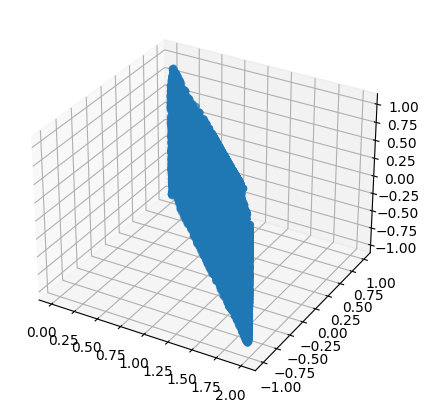

In [4]:
#Square Tilted in 3D
A = np.array([[1, 1, 0],[-1, -1, 0],[0, 1, 0],[0, -1, 0],[0, 0, 1],[0, 0, -1]])
b = np.array([[1],[-1],[1],[1],[1],[1]])

results = full_run(A, b, DikinWalk, 10000).round(10)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(results[:,0],results[:,1],results[:,2])
plt.show()

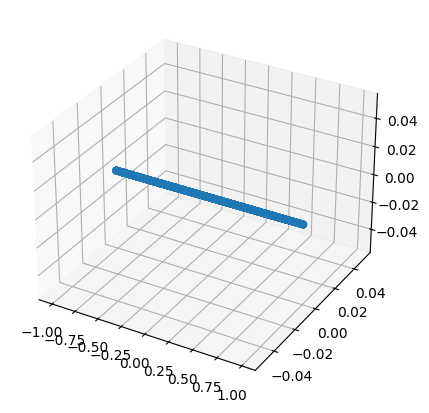

In [5]:
#Line in 3D Data
A = np.array([[1, 0, 0],[-1, 0, 0],[0, 1, 0],[0, -1, 0],[0, 0, 1],[0, 0, -1]])
b = np.array([[1],[1],[0],[0],[0],[0]])

results = full_run(A, b, DikinWalk, 10000).round(10)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(results[:,0],results[:,1],results[:,2])
plt.show()

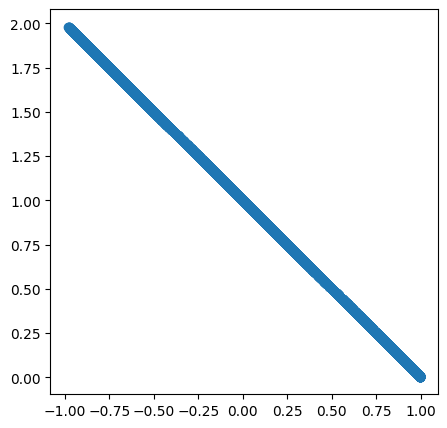

In [6]:
#Line Tilted in 2D Data
A = np.array([[1, 0],[-1, 0],[1, 1],[-1, -1]])
b = np.array([[1],[1],[1],[-1]])

results = full_run(A, b, VaidyaWalk, 10000).round(10)
fig = plt.figure(figsize=(5, 5))
plt.scatter(results[:,0],results[:,1])
plt.show()

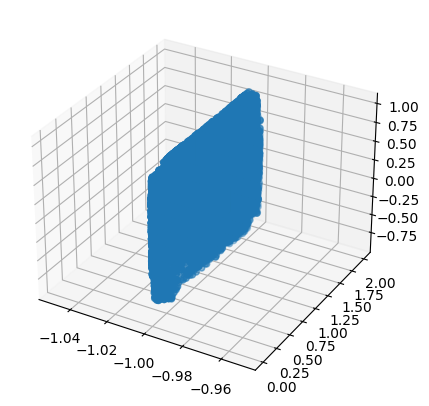

In [7]:
#Square in 3D Data
A = np.array([[1, 0, 0],[-1, 0, 0],[1, 1, 0],[-1, -1, 0],[0, 0, 1],[0, 0, -1]])
b = np.array([[-1],[1],[1],[1],[1],[1]])

results = full_run(A, b, VaidyaWalk, 10000).round(10)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(results[:,0],results[:,1],results[:,2])
plt.show()

In [ ]:
#Square in 2D Data
A = np.array([[1, 0], [-1, 0],[0, 1], [0, -1]])
b = np.array([[1],[1],[1],[1]])

results = full_run(A, b, JohnWalk, 10000).round(10)
fig = plt.figure(figsize=(5, 5))
plt.scatter(results[:,0],results[:,1])
plt.show()